## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Combine the data into a single dataset
merged_df= study_results.merge(mouse_metadata, on="Mouse ID")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice in the DataFrame.
total_mice=merged_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mouse["Mouse ID"].unique())

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= pd.DataFrame(merged_df)
mouse_duplicates = cleaned_df[ (cleaned_df['Mouse ID'] == "g989") ].index
cleaned_df.drop(mouse_duplicates, inplace=True)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
total_cleaned=cleaned_df["Mouse ID"].nunique()
total_cleaned

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = cleaned_df.groupby(["Drug Regimen"])

mean_tumor=drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor=drug_regimen["Tumor Volume (mm3)"].median()
variance_tumor=drug_regimen["Tumor Volume (mm3)"].var()
stddev_tumor=drug_regimen["Tumor Volume (mm3)"].std()
stderr_tumor=drug_regimen["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor,"Median Tumor Volume": median_tumor,
                         "Tumor Volume Variance": variance_tumor,"Tumor Volume Std. Dev.": stddev_tumor,
                               "Tumor Volume Std. Err.": stderr_tumor})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Data Points')

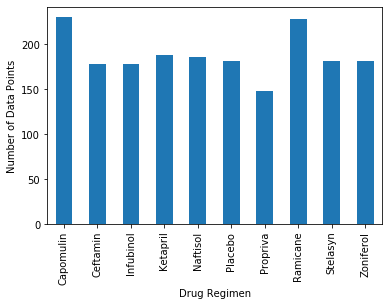

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimen_group= cleaned_df.groupby("Drug Regimen")
mice_per_timepoint = regimen_group["Timepoint"].count()
bar_chart= mice_per_timepoint.plot(kind="bar")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Data Points")


<function matplotlib.pyplot.show(*args, **kw)>

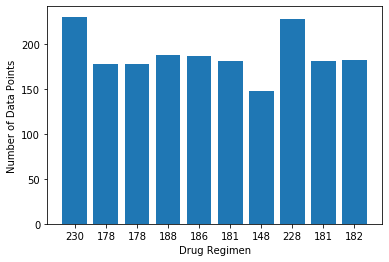

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_per_timepoint))
plt.bar(x_axis, mice_per_timepoint, linewidth=20)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(x_axis,mice_per_timepoint)
plt.show

## Pie Plots

Text(0, 0.5, 'Sex')

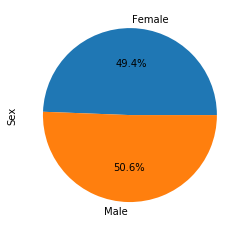

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged_df.groupby("Sex")
gender_distribution= gender_group["Mouse ID"].count()

pie_chart=gender_distribution.plot(kind="pie", y=gender_distribution, autopct='%1.1f%%')
pie_chart.set_ylabel("Sex")


Text(0, 0.5, 'Sex')

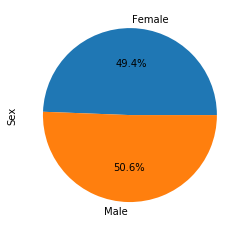

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart= gender_distribution.plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
c_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
r_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
i_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ce_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [ ]:
#Timepoint/ C/R/I/CE
c_max = c_df.groupby('Mouse ID').max()['Timepoint']
c_max_df = pd.DataFrame(c_max)
c_max_merge = pd.merge(c_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
c_max_merge.head()

r_max = r_df.groupby('Mouse ID').max()['Timepoint']
r_max_df = pd.DataFrame(r_max)
r_max_merge = pd.merge(r_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
r_max_merge.head()

i_max = i_df.groupby('Mouse ID').max()['Timepoint']
i_max_df = pd.DataFrame(i_max)
i_max_merge = pd.merge(i_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
i_max_merge.head()

ce_max = ce_df.groupby('Mouse ID').max()['Timepoint']
ce_max_df = pd.DataFrame(ce_max)
ce_max_merge = pd.merge(ce_max_df,merged_df,on=("Mouse ID","Timepoint"),how="left")
ce_max_merge.head()

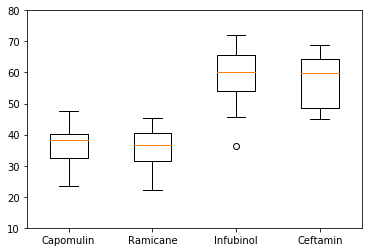

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

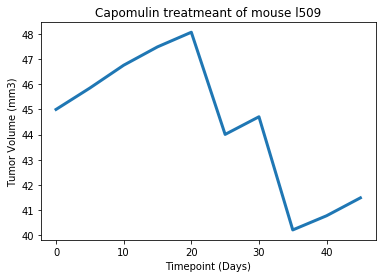

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
line_df = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
x_axis_tp = line_df["Timepoint"]
tv = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_tp,tv,linewidth=3, markersize=15)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

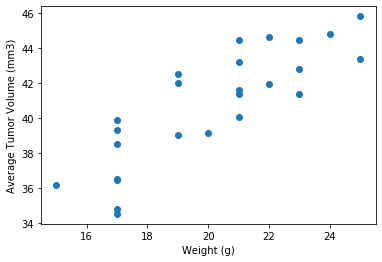

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lr_model=st.linregress(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])
lr_model

lr_slope = 0.9544396890241045 
lr_intercept= 21.552160532685015

y_values = c_df_average['Weight (g)']*lr_slope+lr_intercept
plt.scatter(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])

plt.plot(c_df_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('mouse weight vs avg tumor volume for Capomulin regimen')

plt.savefig('regression')
plt.show()